In [4]:
install.packages("moments")
install.packages("readxl")
install.packages("tidyverse")
install.packages("ISLR")
install.packages("VIM")
install.packages("MASS")
install.packages("moments")
install.packages("nortest")
install.packages("kknn")
install.packages("class")
install.packages("mice")

Warning message:
"package 'moments' is in use and will not be installed"
Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'ISLR' is in use and will not be installed"
Warning message:
"package 'VIM' is in use and will not be installed"
Warning message:
"package 'MASS' is in use and will not be installed"
Warning message:
"package 'moments' is in use and will not be installed"
Warning message:
"package 'nortest' is in use and will not be installed"
Warning message:
"package 'kknn' is in use and will not be installed"
Warning message:
"package 'class' is in use and will not be installed"
Warning message:
"package 'mice' is in use and will not be installed"


In [31]:
library(ISLR)
library(plyr)
library(moments)
library(nortest)
library(MASS)
library(kknn)
library(class)
library(readxl)
library(tidyverse)
library(mice)
library(VIM)

In [32]:
dataf = read.csv("C:/Users/javij/Desktop/training_set_features.csv")
labels = read.csv("C:/Users/javij/Desktop/training_set_labels.csv")

In [33]:
summary(dataf)

 respondent_id    h1n1_concern   h1n1_knowledge  behavioral_antiviral_meds
 Min.   :    0   Min.   :0.000   Min.   :0.000   Min.   :0.00000          
 1st Qu.: 6676   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.00000          
 Median :13353   Median :2.000   Median :1.000   Median :0.00000          
 Mean   :13353   Mean   :1.618   Mean   :1.263   Mean   :0.04884          
 3rd Qu.:20030   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:0.00000          
 Max.   :26706   Max.   :3.000   Max.   :2.000   Max.   :1.00000          
                 NA's   :92      NA's   :116     NA's   :71               
 behavioral_avoidance behavioral_face_mask behavioral_wash_hands
 Min.   :0.0000       Min.   :0.00000      Min.   :0.0000       
 1st Qu.:0.0000       1st Qu.:0.00000      1st Qu.:1.0000       
 Median :1.0000       Median :0.00000      Median :1.0000       
 Mean   :0.7256       Mean   :0.06898      Mean   :0.8256       
 3rd Qu.:1.0000       3rd Qu.:0.00000      3rd Qu.:1.0000       
 Max.   :1

In [7]:
str(dataf)

'data.frame':	26707 obs. of  36 variables:
 $ respondent_id              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ h1n1_concern               : int  1 3 1 1 2 3 0 1 0 2 ...
 $ h1n1_knowledge             : int  0 2 1 1 1 1 0 0 2 1 ...
 $ behavioral_antiviral_meds  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_avoidance       : int  0 1 1 1 1 1 0 1 1 1 ...
 $ behavioral_face_mask       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_wash_hands      : int  0 1 0 1 1 1 0 1 1 0 ...
 $ behavioral_large_gatherings: int  0 0 0 1 1 0 0 0 1 1 ...
 $ behavioral_outside_home    : int  1 1 0 0 0 0 0 0 1 0 ...
 $ behavioral_touch_face      : int  1 1 0 0 1 1 0 1 1 1 ...
 $ doctor_recc_h1n1           : int  0 0 NA 0 0 0 0 1 0 0 ...
 $ doctor_recc_seasonal       : int  0 0 NA 1 0 1 0 0 0 0 ...
 $ chronic_med_condition      : int  0 0 1 1 0 0 0 1 0 1 ...
 $ child_under_6_months       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ health_worker              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ health_insurance           : int  1 1

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"



 Variables sorted by number of missings: 
                    Variable       Count
            health_insurance 0.459579885
            doctor_recc_h1n1 0.080877673
        doctor_recc_seasonal 0.080877673
       chronic_med_condition 0.036357509
        child_under_6_months 0.030703561
               health_worker 0.030104467
 opinion_seas_sick_from_vacc 0.020107088
           opinion_seas_risk 0.019245891
 opinion_seas_vacc_effective 0.017298836
 opinion_h1n1_sick_from_vacc 0.014790130
 opinion_h1n1_vacc_effective 0.014640356
           opinion_h1n1_risk 0.014528026
            household_adults 0.009323398
          household_children 0.009323398
        behavioral_avoidance 0.007788220
       behavioral_touch_face 0.004792751
              h1n1_knowledge 0.004343431
                h1n1_concern 0.003444790
 behavioral_large_gatherings 0.003257573
     behavioral_outside_home 0.003070356
   behavioral_antiviral_meds 0.002658479
       behavioral_wash_hands 0.001572621
        behavi

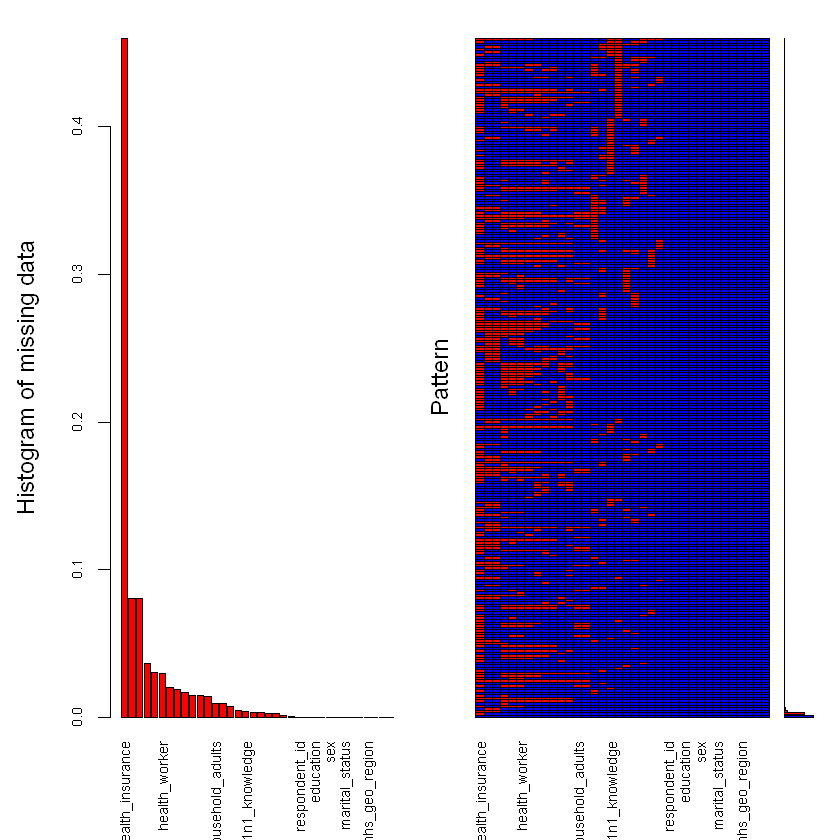

In [8]:
 aggr_plot <- aggr(dataf, col=c('blue','red'), numbers=TRUE,sortVars=TRUE, labels=names(dataf), cex.axis=.7, gap=3,
                   ylab=c("Histogram of missing data","Pattern"))

In [43]:
joined_df = merge(dataf,labels)
joined_df= joined_df[,-c(16,35,36)]
ncol(joined_df)
str(joined_df)

[1] 35

'data.frame':	26707 obs. of  35 variables:
 $ respondent_id              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ h1n1_concern               : int  1 3 1 1 2 3 0 1 0 2 ...
 $ h1n1_knowledge             : int  0 2 1 1 1 1 0 0 2 1 ...
 $ behavioral_antiviral_meds  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_avoidance       : int  0 1 1 1 1 1 0 1 1 1 ...
 $ behavioral_face_mask       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_wash_hands      : int  0 1 0 1 1 1 0 1 1 0 ...
 $ behavioral_large_gatherings: int  0 0 0 1 1 0 0 0 1 1 ...
 $ behavioral_outside_home    : int  1 1 0 0 0 0 0 0 1 0 ...
 $ behavioral_touch_face      : int  1 1 0 0 1 1 0 1 1 1 ...
 $ doctor_recc_h1n1           : int  0 0 NA 0 0 0 0 1 0 0 ...
 $ doctor_recc_seasonal       : int  0 0 NA 1 0 1 0 0 0 0 ...
 $ chronic_med_condition      : int  0 0 1 1 0 0 0 1 0 1 ...
 $ child_under_6_months       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ health_worker              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ opinion_h1n1_vacc_effective: int  3 5

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"



 Variables sorted by number of missings: 
                    Variable       Count
            doctor_recc_h1n1 0.080877673
        doctor_recc_seasonal 0.080877673
       chronic_med_condition 0.036357509
        child_under_6_months 0.030703561
               health_worker 0.030104467
           opinion_seas_risk 0.020107088
 opinion_seas_vacc_effective 0.019245891
 opinion_h1n1_sick_from_vacc 0.017298836
           opinion_h1n1_risk 0.014790130
            health_insurance 0.014640356
 opinion_h1n1_vacc_effective 0.014528026
                  census_msa 0.009323398
            household_adults 0.009323398
        behavioral_avoidance 0.007788220
       behavioral_touch_face 0.004792751
              h1n1_knowledge 0.004343431
                h1n1_concern 0.003444790
 behavioral_large_gatherings 0.003257573
     behavioral_outside_home 0.003070356
   behavioral_antiviral_meds 0.002658479
       behavioral_wash_hands 0.001572621
        behavioral_face_mask 0.000711424
              

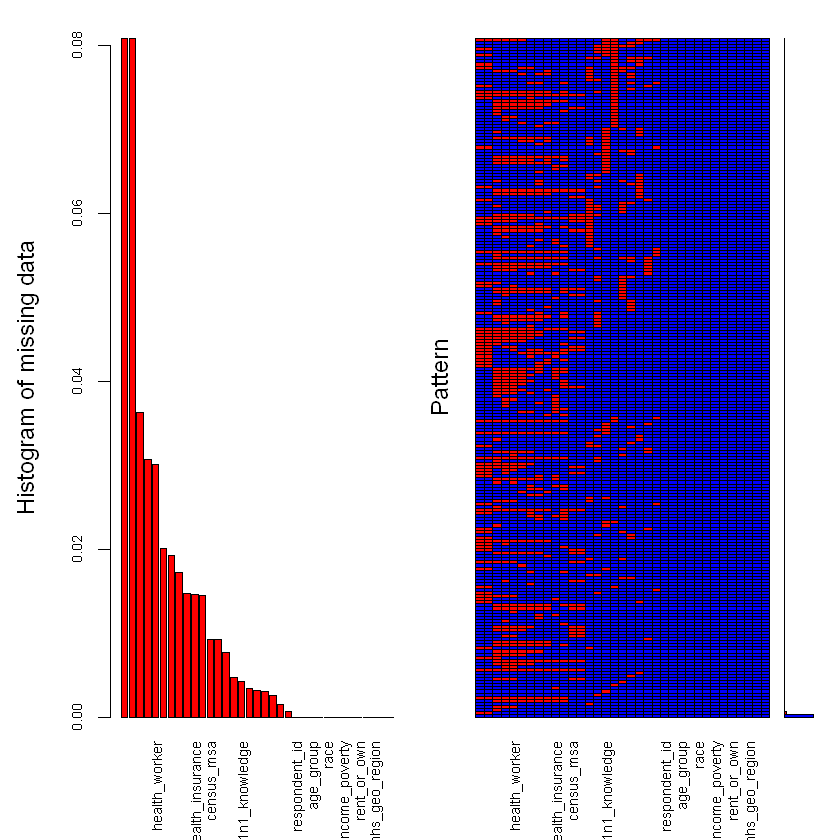

In [44]:
 aggr_plot <- aggr(joined_df, col=c('blue','red'), numbers=TRUE,sortVars=TRUE, labels=names(dataf), cex.axis=.7, gap=3,
                   ylab=c("Histogram of missing data","Pattern"))

In [46]:
nrow(joined_df)

[1] 26707

In [47]:
imputed_Data = mice(joined_df, m=5, maxit = 5, method = 'pmm', seed = 500)


 iter imp variable
  1   1  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  household_children
  1   2  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sick_from_vacc  household_adult

Warning message:
"Number of logged events: 10"


In [48]:
df = complete(imputed_Data)


 Variables sorted by number of missings: 
                    Variable Count
               respondent_id     0
                h1n1_concern     0
              h1n1_knowledge     0
   behavioral_antiviral_meds     0
        behavioral_avoidance     0
        behavioral_face_mask     0
       behavioral_wash_hands     0
 behavioral_large_gatherings     0
     behavioral_outside_home     0
       behavioral_touch_face     0
            doctor_recc_h1n1     0
        doctor_recc_seasonal     0
       chronic_med_condition     0
        child_under_6_months     0
               health_worker     0
 opinion_h1n1_vacc_effective     0
           opinion_h1n1_risk     0
 opinion_h1n1_sick_from_vacc     0
 opinion_seas_vacc_effective     0
           opinion_seas_risk     0
 opinion_seas_sick_from_vacc     0
                   age_group     0
                   education     0
                        race     0
                         sex     0
              income_poverty     0
            

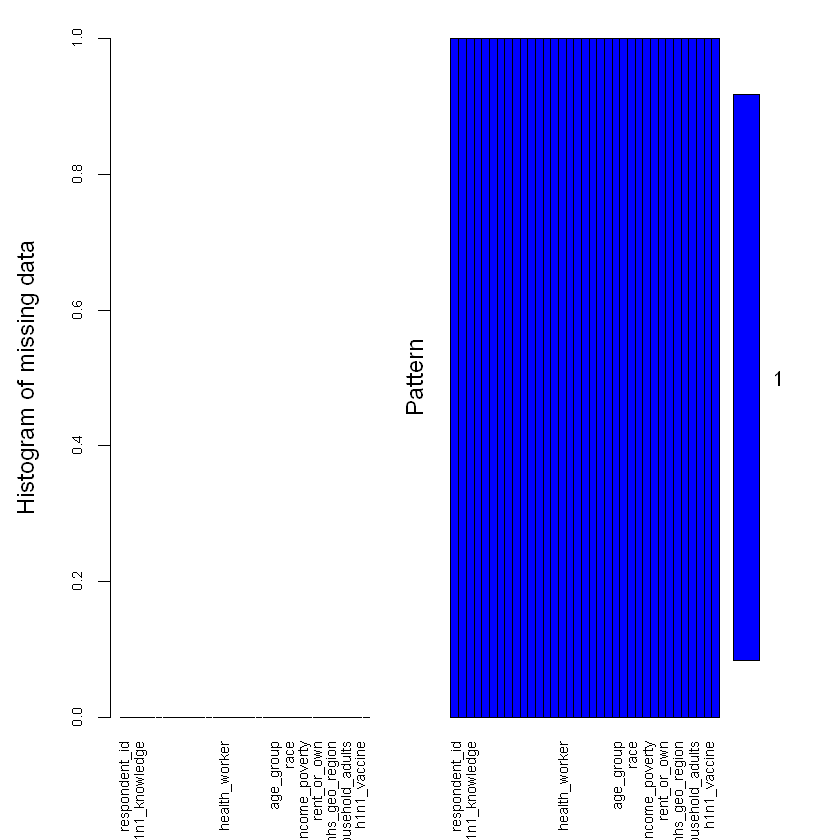

In [49]:
 aggr_plot <- aggr(df, col=c('blue','red'), numbers=TRUE,sortVars=TRUE, labels=names(df), cex.axis=.7, gap=3,
                   ylab=c("Histogram of missing data","Pattern"))

In [50]:
write.csv(df,"C:/Users/javij/Desktop/training_clean.csv", row.names = FALSE)

In [51]:
prueba = read.csv("C:/Users/javij/Desktop/training_clean.csv")

In [52]:
prueba

respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
0,1,0,0,0,0,0,0,1,1,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,0,0
1,3,2,0,1,0,1,0,1,1,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,0,1
2,1,1,0,1,0,0,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,0,0
3,1,1,0,1,0,1,1,0,0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,0,1
4,2,1,0,1,0,1,1,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,0,0
5,3,1,0,1,0,1,0,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3,0,0
6,0,0,0,0,0,0,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0,0,0
7,1,0,0,1,0,1,0,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2,0,1,1
8,0,2,0,1,0,1,1,1,1,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1,0,0,0


In [ ]:
x <- sapply(df, is.factor)
df[ , x] <- as.data.frame(apply(df[ , x], 2, as.numeric))
df

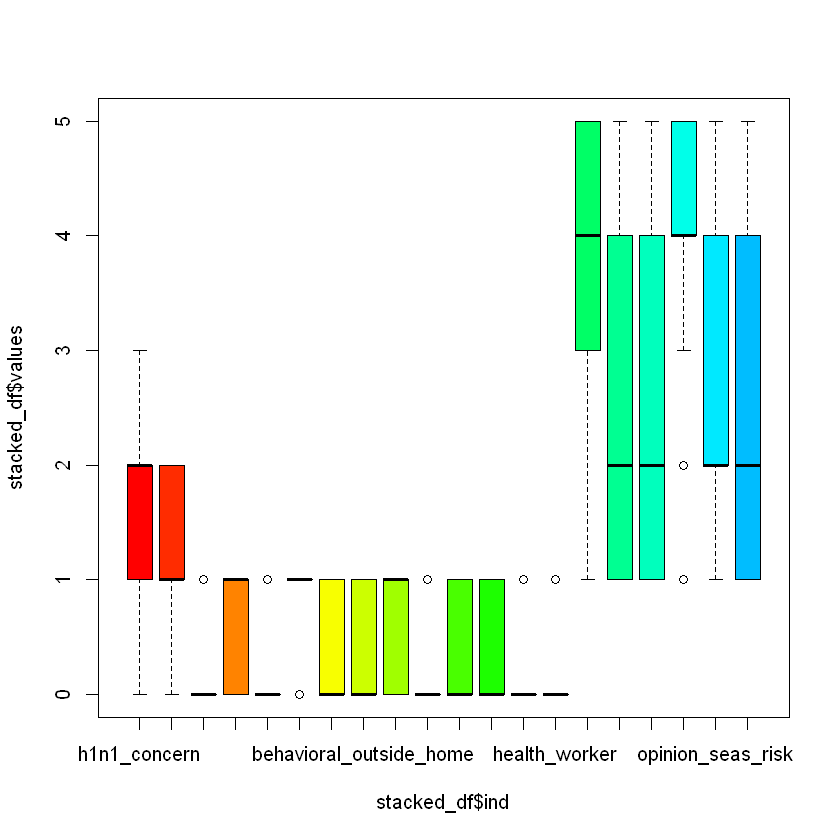

In [39]:
stacked_df = stack(df[,2:21,21])
boxplot(stacked_df$values ~ stacked_df$ind,col = rainbow(ncol(df)-2))

In [ ]:
table(